# Evaluating Hospital Effectiveness - Data Generation and Balancing


Thien Nguyen

## Abstract

There are ubiquitous problems within the US healthcare system, and one of the biggest problems revolves around costs. While every single hospital in the US has a chargemaster, a list of costs for all billable procedures, accessing this esoteric list as a consumer is nigh impossible, as [Vox](https://www.youtube.com/watch?v=Tct38KwROdw) has demonstrated.

As a result, market forces that are supposed to drive down prices via competition are ineffective due to the secrecy of these prices. This leads to wild discrepancies between institutions. Human psychology dictates that one's health is vital, which allow many healthcare services and products to have an inelastic demand. Furthermore, this also creates a misconceived notion around utility and price--Ie. consumers believe that paying higher prices for healthcare services actually results in better services.

This investigation seeks to evaluate whether this ideation is true or if it is simply a misconception. Since chargemasters are secretive, it would be greatly beneficial for the public if there are some other factors that can be used for cost-benefit analysis when it comes to healthcare. Shedding truth on this matter may provide critical information for the public that is necessary for driving down costs for an industry littered with problems.

If a highly accurate model can be established, then many consumers would indeed pay for such information. Of course, this does not need to be in the form of monetary payment. Offering the model as a free-service would lead to high traffic, which would in turn allure merchants to buy advertising pace. 

In [1]:
#Create a seed for reproducible results
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
np.random.seed(0)

Using TensorFlow backend.


In [2]:
df = pd.read_csv('null_df.csv')
print(df.shape)
df.head()

(4444, 137)


,Provider_ID,Rate of complications for hip/knee replacement patients_Denominator,Rate of complications for hip/knee replacement patients_Score,Rate of complications for hip/knee replacement patients_Lower Estimate,Rate of complications for hip/knee replacement patients_Higher Estimate,Death rate for heart attack patients_Denominator,Death rate for heart attack patients_Score,Death rate for heart attack patients_Lower Estimate,Death rate for heart attack patients_Higher Estimate,Death rate for CABG surgery patients_Denominator,...,Value of Care Heart Failure measur_Higher estimate,Value of Care Pneumonia measure_Denominator,Value of Care Pneumonia measure_Payment,Value of Care Pneumonia measure_Lower estimate,Value of Care Pneumonia measure_Higher estimate,Value of Care hip/knee replacement_Denominator,Value of Care hip/knee replacement_Payment,Value of Care hip/knee replacement_Lower estimate,Value of Care hip/knee replacement_Higher estimate,Spending_Score
0,10001,292.0,3.2,2.1,4.8,688.0,13.0,11.0,15.5,291.0,...,18523.0,531.0,19203.0,18191.0,20214.0,284.0,24984.0,23894.0,26172.0,0.99
1,10005,257.0,2.8,1.7,4.4,80.0,14.8,11.6,18.8,NaN,...,18165.0,669.0,15973.0,15206.0,16718.0,253.0,22051.0,21041.0,23103.0,1.01
2,10006,389.0,2.6,1.7,4.0,441.0,15.4,12.8,18.3,145.0,...,18143.0,426.0,25008.0,23445.0,26652.0,642.0,16820.0,15992.0,17657.0,0.99
3,10007,31.0,2.8,1.6,4.8,NaN,NaN,NaN,NaN,NaN,...,16788.0,209.0,16469.0,15038.0,17786.0,30.0,22066.0,19589.0,24807.0,1.08
4,10008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17018.0,47.0,14702.0,12387.0,17048.0,NaN,NaN,NaN,NaN,1.06


In [12]:
def detect_threshold_nulls(df, threshold, axis):
    """Returns the number and percentage of rows or columns with that has a percentage of null values above a declared
    threshold

    Parameters:
    -----------
    df : pandas DataFrame
    threshold: Float. Value must be between 0-1.0
    axis: Int. 1 for null count in columns. 0 for null count in rows
    

    Returns:
    --------
    
    If axis == 0, returns a list of row indices; if axis == 1, returns list of column names; else, error message
    
    """
    if axis == 1:
        total_entries = df.shape[0]
        above_threshold = []
        for col in df.columns:
            nulls = df[col].isna().sum()
            if nulls/total_entries >= threshold:
                above_threshold.append(col)
        print('Number of columns above threshold: {} \n percentage of total df with {}% missing:{}'.format(len(above_threshold), round(threshold*100,2), round(len(above_threshold)/(df.shape[1]),2)*100))
        return above_threshold
 
    elif axis == 0:
        total_feat = df.shape[1]
        above_threshold = []
        for i in df.index:
            nulls = df.iloc[i].isna().sum()
            if nulls/total_feat >= threshold:
                above_threshold.append(i)
        print('Number of rows above threshold: {} \n percentage of total df with {}% missing:{}'.format(len(above_threshold), round(threshold*100,2), round(len(above_threshold)/(df.shape[0]),2)*100))
        return above_threshold
    
    else:
        print('axis must be either 1 for detecting nulls in columns or 0 for detecting nulls in rows')
        

In [15]:
row_eighty_nulls = detect_threshold_nulls(df, .8, 0)
col_eighty_nulls = detect_threshold_nulls(df, .8, 1)

Number of rows above threshold: 784 
 percentage of total df with 80.0% missing:18.0
Number of columns above threshold: 3 
 percentage of total df with 80.0% missing:2.0


In [ ]:
final_drop = final.drop(eighty_nulls, axis = 0)

In [ ]:
final3 = final2.drop(seventy_nulls, axis = 1)

In [ ]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
    
missing_values_table(final3)['Missing Values'].sum()/(final3.shape[0]*final3.shape[1])

In [30]:
#create a list of indices where no nulls are present
no_nulls = [i for i  in df.index if all(pd.notnull(df.iloc[i]))]

#create a new null column and set the default as null = 1
df['null'] = 1

#for each index in the no nulls list, set the null column to 0 
for i in no_nulls:
    df.iloc[i, df.columns.get_loc('null')] = 0

df.head()

,Provider_ID,Rate of complications for hip/knee replacement patients_Denominator,Rate of complications for hip/knee replacement patients_Score,Rate of complications for hip/knee replacement patients_Lower Estimate,Rate of complications for hip/knee replacement patients_Higher Estimate,Death rate for heart attack patients_Denominator,Death rate for heart attack patients_Score,Death rate for heart attack patients_Lower Estimate,Death rate for heart attack patients_Higher Estimate,Death rate for CABG surgery patients_Denominator,...,Value of Care Pneumonia measure_Denominator,Value of Care Pneumonia measure_Payment,Value of Care Pneumonia measure_Lower estimate,Value of Care Pneumonia measure_Higher estimate,Value of Care hip/knee replacement_Denominator,Value of Care hip/knee replacement_Payment,Value of Care hip/knee replacement_Lower estimate,Value of Care hip/knee replacement_Higher estimate,Spending_Score,null
0,10001,292.0,3.2,2.1,4.8,688.0,13.0,11.0,15.5,291.0,...,531.0,19203.0,18191.0,20214.0,284.0,24984.0,23894.0,26172.0,0.99,1
1,10005,257.0,2.8,1.7,4.4,80.0,14.8,11.6,18.8,NaN,...,669.0,15973.0,15206.0,16718.0,253.0,22051.0,21041.0,23103.0,1.01,1
2,10006,389.0,2.6,1.7,4.0,441.0,15.4,12.8,18.3,145.0,...,426.0,25008.0,23445.0,26652.0,642.0,16820.0,15992.0,17657.0,0.99,1
3,10007,31.0,2.8,1.6,4.8,NaN,NaN,NaN,NaN,NaN,...,209.0,16469.0,15038.0,17786.0,30.0,22066.0,19589.0,24807.0,1.08,1
4,10008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.0,14702.0,12387.0,17048.0,NaN,NaN,NaN,NaN,1.06,1


In [32]:
#create a df of only providers without nulls
no_nulls_df = df.iloc[no_nulls]

#use 1/3 of the no nulls df as a test set
test = no_nulls_df.sample(frac=.33, random_state = 0)

In [33]:
#drop the test set from the original df
df.drop(test.index, axis = 0, inplace = True)
print(df.shape)

(4335, 138)


In [34]:
print(test.shape)

(109, 138)


In [35]:
#Check how much of the data is actually missing information
print('total entries with no missing data: {}'.format(len(df[df.null == 0])))
print('total entries with missing data: {}'.format(len(df[df.null == 1])))


total entries with no missing data: 222
total entries with missing data: 4113


<BarContainer object of 2 artists>

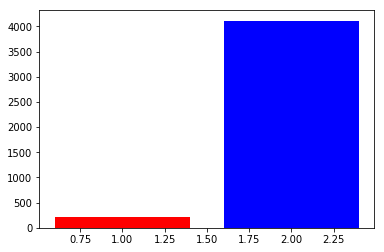

In [36]:
import matplotlib.pyplot as plt

#visual the imbalnce of nul and non_null data
no_nulls_idx = df[df['null']==0].shape[0]
nulls_idx = df[df['null']==1].shape[0]

plt.bar(x=[1,2], height = [no_nulls_idx, nulls_idx], color = ['red', 'blue'])

## Oversampling with SMOTE

SMOTE synthetically creates new, minority observations based on KNN. However, it cannot be used on a dataset with null values. Since, our *knn_df.csv* dataset has already been imputed and pseudolabeled, we can use SMOTE on this dataset to balance classes.

In [26]:
imp_df = pd.read_csv('knn_df.csv')
print(imp_df.shape)
imp_df.head()

(4444, 130)


,Provider_ID,Rate of complications for hip/knee replacement patients_Denominator,Rate of complications for hip/knee replacement patients_Score,Rate of complications for hip/knee replacement patients_Lower Estimate,Rate of complications for hip/knee replacement patients_Higher Estimate,Death rate for heart attack patients_Denominator,Death rate for heart attack patients_Score,Death rate for heart attack patients_Lower Estimate,Death rate for heart attack patients_Higher Estimate,Death rate for COPD patients_Denominator,...,Value of Care Heart Failure measur_Higher estimate,Value of Care Pneumonia measure_Denominator,Value of Care Pneumonia measure_Payment,Value of Care Pneumonia measure_Lower estimate,Value of Care Pneumonia measure_Higher estimate,Value of Care hip/knee replacement_Denominator,Value of Care hip/knee replacement_Payment,Value of Care hip/knee replacement_Lower estimate,Value of Care hip/knee replacement_Higher estimate,Spending_Score
0,10001.0,292.000000,3.200000,2.100000,4.800000,688.000000,13.000000,11.000000,15.500000,411.0,...,18523.0,531.0,19203.0,18191.0,20214.0,284.000000,24984.000000,23894.000000,26172.00000,0.99
1,10005.0,257.000000,2.800000,1.700000,4.400000,80.000000,14.800000,11.600000,18.800000,559.0,...,18165.0,669.0,15973.0,15206.0,16718.0,253.000000,22051.000000,21041.000000,23103.00000,1.01
2,10006.0,389.000000,2.600000,1.700000,4.000000,441.000000,15.400000,12.800000,18.300000,546.0,...,18143.0,426.0,25008.0,23445.0,26652.0,642.000000,16820.000000,15992.000000,17657.00000,0.99
3,10007.0,31.000000,2.800000,1.600000,4.800000,146.496309,13.027213,10.153094,16.543474,113.0,...,16788.0,209.0,16469.0,15038.0,17786.0,30.000000,22066.000000,19589.000000,24807.00000,1.08
4,10008.0,355.680874,2.587723,1.607322,4.161275,203.828118,12.838563,10.168224,16.042265,29.0,...,17018.0,47.0,14702.0,12387.0,17048.0,331.660343,20478.631886,19111.843123,21954.64575,1.06


In [38]:
df.iloc[no_nulls[0:3]]

,Provider_ID,Rate of complications for hip/knee replacement patients_Denominator,Rate of complications for hip/knee replacement patients_Score,Rate of complications for hip/knee replacement patients_Lower Estimate,Rate of complications for hip/knee replacement patients_Higher Estimate,Death rate for heart attack patients_Denominator,Death rate for heart attack patients_Score,Death rate for heart attack patients_Lower Estimate,Death rate for heart attack patients_Higher Estimate,Death rate for CABG surgery patients_Denominator,...,Value of Care Pneumonia measure_Denominator,Value of Care Pneumonia measure_Payment,Value of Care Pneumonia measure_Lower estimate,Value of Care Pneumonia measure_Higher estimate,Value of Care hip/knee replacement_Denominator,Value of Care hip/knee replacement_Payment,Value of Care hip/knee replacement_Lower estimate,Value of Care hip/knee replacement_Higher estimate,Spending_Score,null
13,10024,305.0,2.9,1.9,4.5,271.0,14.5,11.9,17.3,193.0,...,255.0,28400.0,26097.0,30932.0,399.0,17032.0,15997.0,18150.0,1.03,0
15,10032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,15031.0,12565.0,17492.0,NaN,NaN,NaN,NaN,0.96,1
17,10034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.0,16558.0,14450.0,18641.0,NaN,NaN,NaN,NaN,0.99,1


In [39]:
imp_df.iloc[no_nulls[0:3]]

,Provider_ID,Rate of complications for hip/knee replacement patients_Denominator,Rate of complications for hip/knee replacement patients_Score,Rate of complications for hip/knee replacement patients_Lower Estimate,Rate of complications for hip/knee replacement patients_Higher Estimate,Death rate for heart attack patients_Denominator,Death rate for heart attack patients_Score,Death rate for heart attack patients_Lower Estimate,Death rate for heart attack patients_Higher Estimate,Death rate for COPD patients_Denominator,...,Value of Care Heart Failure measur_Higher estimate,Value of Care Pneumonia measure_Denominator,Value of Care Pneumonia measure_Payment,Value of Care Pneumonia measure_Lower estimate,Value of Care Pneumonia measure_Higher estimate,Value of Care hip/knee replacement_Denominator,Value of Care hip/knee replacement_Payment,Value of Care hip/knee replacement_Lower estimate,Value of Care hip/knee replacement_Higher estimate,Spending_Score
13,10029.0,700.000000,3.400000,2.500000,4.700000,257.000000,15.500000,12.600000,18.900000,392.0,...,21554.000000,240.0,24928.0,22912.0,27063.0,647.000000,15497.000000,14719.000000,16311.000000,0.92
14,10032.0,355.680874,2.587723,1.607322,4.161275,203.828118,12.838563,10.168224,16.042265,32.0,...,19922.648531,37.0,15031.0,12565.0,17492.0,331.660343,20478.631886,19111.843123,21954.645750,0.96
16,10034.0,159.900883,2.649702,1.546438,4.479526,143.199523,13.096583,10.198889,16.634720,70.0,...,17162.000000,73.0,16558.0,14450.0,18641.0,180.192954,20743.279004,19011.496403,22631.183367,0.99


In [42]:
imp_df['Provider_ID'] = imp_df['Provider_ID'].astype(int)
imp_df.head()

,Provider_ID,Rate of complications for hip/knee replacement patients_Denominator,Rate of complications for hip/knee replacement patients_Score,Rate of complications for hip/knee replacement patients_Lower Estimate,Rate of complications for hip/knee replacement patients_Higher Estimate,Death rate for heart attack patients_Denominator,Death rate for heart attack patients_Score,Death rate for heart attack patients_Lower Estimate,Death rate for heart attack patients_Higher Estimate,Death rate for COPD patients_Denominator,...,Value of Care Heart Failure measur_Higher estimate,Value of Care Pneumonia measure_Denominator,Value of Care Pneumonia measure_Payment,Value of Care Pneumonia measure_Lower estimate,Value of Care Pneumonia measure_Higher estimate,Value of Care hip/knee replacement_Denominator,Value of Care hip/knee replacement_Payment,Value of Care hip/knee replacement_Lower estimate,Value of Care hip/knee replacement_Higher estimate,Spending_Score
0,10001,292.000000,3.200000,2.100000,4.800000,688.000000,13.000000,11.000000,15.500000,411.0,...,18523.0,531.0,19203.0,18191.0,20214.0,284.000000,24984.000000,23894.000000,26172.00000,0.99
1,10005,257.000000,2.800000,1.700000,4.400000,80.000000,14.800000,11.600000,18.800000,559.0,...,18165.0,669.0,15973.0,15206.0,16718.0,253.000000,22051.000000,21041.000000,23103.00000,1.01
2,10006,389.000000,2.600000,1.700000,4.000000,441.000000,15.400000,12.800000,18.300000,546.0,...,18143.0,426.0,25008.0,23445.0,26652.0,642.000000,16820.000000,15992.000000,17657.00000,0.99
3,10007,31.000000,2.800000,1.600000,4.800000,146.496309,13.027213,10.153094,16.543474,113.0,...,16788.0,209.0,16469.0,15038.0,17786.0,30.000000,22066.000000,19589.000000,24807.00000,1.08
4,10008,355.680874,2.587723,1.607322,4.161275,203.828118,12.838563,10.168224,16.042265,29.0,...,17018.0,47.0,14702.0,12387.0,17048.0,331.660343,20478.631886,19111.843123,21954.64575,1.06


In [66]:
no_null_prov = df.iloc[no_nulls]['Provider_ID']
no_null_prov.shape

(331,)

In [65]:
exp = pd.read_csv('pure_df.csv')
exp.shape

(936, 130)

In [60]:
no_null_indices = imp_df.loc[imp_df['Provider_ID'].isin(no_null_prov)].index

#create a new null column and set the default as null = 1
imp_df['null'] = 1

#for each index in the no nulls list, set the null column to 0 
for i in no_null_indices:
    imp_df.iloc[i, imp_df.columns.get_loc('null')] = 0

imp_df.head()


,Provider_ID,Rate of complications for hip/knee replacement patients_Denominator,Rate of complications for hip/knee replacement patients_Score,Rate of complications for hip/knee replacement patients_Lower Estimate,Rate of complications for hip/knee replacement patients_Higher Estimate,Death rate for heart attack patients_Denominator,Death rate for heart attack patients_Score,Death rate for heart attack patients_Lower Estimate,Death rate for heart attack patients_Higher Estimate,Death rate for COPD patients_Denominator,...,Value of Care Pneumonia measure_Denominator,Value of Care Pneumonia measure_Payment,Value of Care Pneumonia measure_Lower estimate,Value of Care Pneumonia measure_Higher estimate,Value of Care hip/knee replacement_Denominator,Value of Care hip/knee replacement_Payment,Value of Care hip/knee replacement_Lower estimate,Value of Care hip/knee replacement_Higher estimate,Spending_Score,null
0,10001,292.000000,3.200000,2.100000,4.800000,688.000000,13.000000,11.000000,15.500000,411.0,...,531.0,19203.0,18191.0,20214.0,284.000000,24984.000000,23894.000000,26172.00000,0.99,1
1,10005,257.000000,2.800000,1.700000,4.400000,80.000000,14.800000,11.600000,18.800000,559.0,...,669.0,15973.0,15206.0,16718.0,253.000000,22051.000000,21041.000000,23103.00000,1.01,1
2,10006,389.000000,2.600000,1.700000,4.000000,441.000000,15.400000,12.800000,18.300000,546.0,...,426.0,25008.0,23445.0,26652.0,642.000000,16820.000000,15992.000000,17657.00000,0.99,1
3,10007,31.000000,2.800000,1.600000,4.800000,146.496309,13.027213,10.153094,16.543474,113.0,...,209.0,16469.0,15038.0,17786.0,30.000000,22066.000000,19589.000000,24807.00000,1.08,1
4,10008,355.680874,2.587723,1.607322,4.161275,203.828118,12.838563,10.168224,16.042265,29.0,...,47.0,14702.0,12387.0,17048.0,331.660343,20478.631886,19111.843123,21954.64575,1.06,1


In [ ]:
from sklearn.model_selection import train_test_split

#separate features/target
X = imp_df.loc[:, df.columns != 'null']
y = imp_df['null']

#train, test, split 
smote = SMOTE(random_state=117)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=117)

#fit SMOTE to training data
columns = X_train.columns
smote_data_x, smote_data_y=smote.fit_sample(X_train, y_train)

#create two dataframes with oversampled data
smote_data_x = pd.DataFrame(data=smote_data_x,columns=columns )
smote_data_y= pd.DataFrame(data=smote_data_y,columns=['null'])

In [ ]:
test = no_nulls_df.sample(frac=.33, random_state = 0)
df.drop(test.index, axis = 0, inplace = True)


In [15]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X = df.loc[:, df.columns != 'null']
y = df.null

X_resampled, y_resampled = ros.fit_resample(X, y)
columns = X.columns

ros_data_X = pd.DataFrame(data=X_resampled,columns=columns )
ros_data_y= pd.DataFrame(y_resampled,columns=['null'])

In [18]:
# Check the numbers
print("length of oversampled data is ",len(ros_data_X))
print("Number of nulls in oversampled data",len(ros_data_y[ros_data_y['null']==0]))
print("Number of pure",len(ros_data_y[ros_data_y['null']==1]))
print("Proportion of nulls in oversampled data is ",len(ros_data_y[ros_data_y['null']==0])/len(ros_data_X))
print("Proportion of pures data in oversampled data is ",len(ros_data_y[ros_data_y['null']==1])/len(ros_data_X))

length of oversampled data is  8226
Number of nulls in oversampled data 4113
Number of pure 4113
Proportion of nulls in oversampled data is  0.5
Proportion of pures data in oversampled data is  0.5


In [23]:
ros_train = ros_data_X
ros_train['null'] = ros_data_y.values
print(ros_train.shape)
ros_train.head()

(8226, 139)


,Provider_ID,Rate of complications for hip/knee replacement patients_Denominator,Rate of complications for hip/knee replacement patients_Score,Rate of complications for hip/knee replacement patients_Lower Estimate,Rate of complications for hip/knee replacement patients_Higher Estimate,Death rate for heart attack patients_Denominator,Death rate for heart attack patients_Score,Death rate for heart attack patients_Lower Estimate,Death rate for heart attack patients_Higher Estimate,Death rate for CABG surgery patients_Denominator,...,Value of Care Pneumonia measure_Payment,Value of Care Pneumonia measure_Lower estimate,Value of Care Pneumonia measure_Higher estimate,Value of Care hip/knee replacement_Denominator,Value of Care hip/knee replacement_Payment,Value of Care hip/knee replacement_Lower estimate,Value of Care hip/knee replacement_Higher estimate,Spending_Score,Null,null
0,10001,292.0,3.2,2.1,4.8,688.0,13.0,11.0,15.5,291.0,...,19203.0,18191.0,20214.0,284.0,24984.0,23894.0,26172.0,0.99,1,1
1,10005,257.0,2.8,1.7,4.4,80.0,14.8,11.6,18.8,NaN,...,15973.0,15206.0,16718.0,253.0,22051.0,21041.0,23103.0,1.01,1,1
2,10006,389.0,2.6,1.7,4.0,441.0,15.4,12.8,18.3,145.0,...,25008.0,23445.0,26652.0,642.0,16820.0,15992.0,17657.0,0.99,1,1
3,10007,31.0,2.8,1.6,4.8,NaN,NaN,NaN,NaN,NaN,...,16469.0,15038.0,17786.0,30.0,22066.0,19589.0,24807.0,1.08,1,1
4,10008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14702.0,12387.0,17048.0,NaN,NaN,NaN,NaN,1.06,1,1


<BarContainer object of 2 artists>

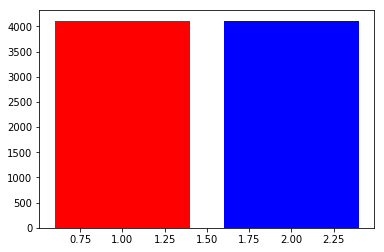

In [24]:
no_nulls = ros_train[ros_train['null']==0].shape[0]
nulls = ros_train[ros_train['null']==1].shape[0]

plt.bar(x=[1,2], height = [no_nulls, nulls], color = ['red', 'blue'])

### Analysis
We've successfully oversampled the "minority" class, which are the entries with entirely no missing data. However, this sampling method is naive.

In [50]:
final = os_data_X

In [51]:
#detect number of nulls at a certain threshold
def detect_row_nulls(df, threshold):
    total_feat = df.shape[1]
    above_threshold = []
    for i in df.index:
        nulls = final.iloc[i].isna().sum()
        if nulls/total_feat >= threshold:
            above_threshold.append(i)
    print('Number of rows above threshold: {} \n percentage of total df with {}% missing:{}'.format(len(above_threshold), round(threshold*100,2), round(len(above_threshold)/(df.shape[0]),2)*100))
    return above_threshold

In [52]:
eighty_nulls = detect_row_nulls(final, .8)
fifty_nulls = detect_row_nulls(final, .5)
thirty_nulls = detect_row_nulls(final, .3)

Number of rows above threshold: 784 
 percentage of total df with 80.0% missing:10.0
Number of rows above threshold: 1586 
 percentage of total df with 50.0% missing:19.0
Number of rows above threshold: 1935 
 percentage of total df with 30.0% missing:24.0


In [112]:
from sklearn.utils import shuffle
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score

#create pseudolabels and train a model with them
class PseudoLabeler(BaseEstimator, RegressorMixin):
    
    def __init__(self, model, test, features, target, sample_rate=0.2, seed=42):
        self.sample_rate = sample_rate
        self.seed = seed
        self.model = model
        self.model.seed = seed
        
        self.test = test
        self.features = features
        self.target = target
        
    def get_params(self, deep=True):
        return {
            "sample_rate": self.sample_rate,
            "seed": self.seed,
            "model": self.model,
            "test": self.test,
            "features": self.features,
            "target": self.target
        }
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
        
    def fit(self, X, y):
        if self.sample_rate > 0.0:
            augemented_train = self.__create_augmented_train(X, y)
            self.model.fit(
                augemented_train[self.features],
                augemented_train[self.target]
            )
        else:
            self.model.fit(X, y)
        
        return self
    
    def __create_augmented_train(self, X, y):
        num_of_samples = int(len(test) * self.sample_rate)
        random_state = 0
        
        # Train the model and creat the pseudo-labels
        self.model.fit(X, y)
        pseudo_labels = self.model.predict(self.test[self.features])
        
        # Add the pseudo-labels to the test set
        augmented_test = test.copy(deep=True)
        augmented_test[self.target] = pseudo_labels
        
        # Take a subset of the test set with pseudo-labels and append in onto
        # the training set
        sampled_test = augmented_test.sample(n=num_of_samples)
        temp_train = pd.concat([X, y], axis=1)
        augemented_train = pd.concat([sampled_test, temp_train])
        return shuffle(augemented_train)
        
    def predict(self, X):
        return self.model.predict(X)
    
    def get_model_name(self):
        return self.model.__class__.__name__

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
target = 'Spending_Score'
features = final.columns[1:-1]

train = final[pd.isnull(final[target]) == False]
test = final[pd.isnull(final[target])]

# Preprocess the data
X_train = train[features]
y_train = train[target]

X_test = test[features]

# Create the PseudoLabeler with XGBRegressor as the base regressor
model = PseudoLabeler(
    xgb.XGBRegressor(nthread=1),
    test,
    features,
    target
)


In [ ]:
from imblearn.over_sampling import SMOTE

X = df.loc[:, df.columns != 'uninsured']
y = df.uninsured
#y = df.loc[:, df.columns == 'uninsured']

os = SMOTE(random_state=69)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

columns = X_train.columns

os_data_X, os_data_y=os.fit_sample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['uninsured'])

# Check the numbers
print("length of oversampled data is ",len(os_data_X))
print("Number of insured in oversampled data",len(os_data_y[os_data_y['uninsured']==0]))
print("Number of uninsured",len(os_data_y[os_data_y['uninsured']==1]))
print("Proportion of insured in oversampled data is ",len(os_data_y[os_data_y['uninsured']==0])/len(os_data_X))
print("Proportion of uninsured data in oversampled data is ",len(os_data_y[os_data_y['uninsured']==1])/len(os_data_X))